Welcome to Office Supplies Data Analytics System

 Enter 1 to see Overall Sales by Category
 Enter 2 to see a Bar Chart containing Office Supplies Sales by Year 
 Enter 3 to see all Office Supplies items with no discounts 
 Enter 4 to see Top Sales in Office Supplies
 Enter 5 to see the Average Office Supplies Discounts by Region for each year
 Enter 6 to exit the menu
Please enter your selection here: 5



Regional Office Supplies discounts for the year: 2017
         Discount
Region           
Central  0.228205
East     0.135983
South    0.174803
West     0.100828
****************************************

Regional Office Supplies discounts for the year: 2018
         Discount
Region           
Central  0.253293
East     0.151673
South    0.170833
West     0.090015
****************************************

Regional Office Supplies discounts for the year: 2019
         Discount
Region           
Central  0.265886
East     0.153185
South    0.138889
West     0.084278
*******************

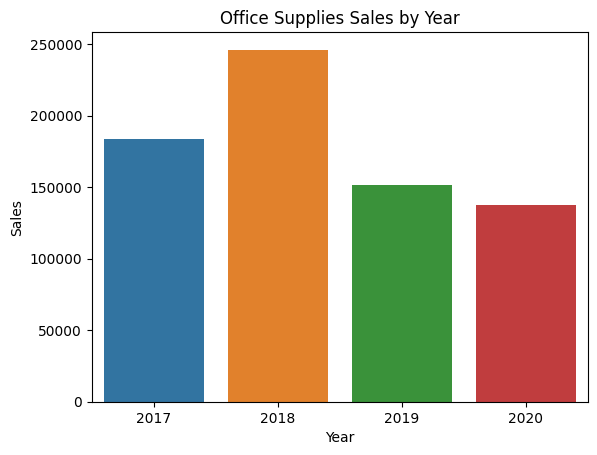



By looking at Office Supplies Sales by Year, you can see that the sales are decreasing after 2018

 Enter 1 to see Overall Sales by Category
 Enter 2 to see a Bar Chart containing Office Supplies Sales by Year 
 Enter 3 to see all Office Supplies items with no discounts 
 Enter 4 to see Top Sales in Office Supplies
 Enter 5 to see the Average Office Supplies Discounts by Region for each year
 Enter 6 to exit the menu
Please enter your selection here: 6


Thank you for using Office Supplies Data Analytics System


In [ ]:


#Andrew Truong
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
import scipy.stats
import numpy as np
xl = pd.ExcelFile("/content/TableauSalesData.xlsx")
SalesData = xl.parse("Orders")
JustOS = SalesData.loc[SalesData["Category"]=="Office Supplies"]

#increasing sales by 20%

def CategorySales():
  CategoryProfitSales = SalesData[["Category", "Profit", "Sales"]].groupby(by="Category").sum().sort_values(by="Sales")
  display(CategoryProfitSales)
  print("\n")
  print("By looking at the Three main Categories of Sales, we can focus on the lowest sales category which is Office Supplies")

def BarTechSalesPerYear():
  JustOSYears = JustOS.copy()
  JustOSYears["Year"] = JustOSYears["Order Date"].dt.year
  JustOSYearsSales = JustOSYears[["Year","Sales"]].groupby(by="Year").sum()
  JustOSYearsSales = JustOSYearsSales.reset_index()
  barchart1= sns.barplot(x="Year", y="Sales", data = JustOSYearsSales)
  barchart1.set_title("Office Supplies Sales by Year")
  pit.show()
  print("\n")
  print("By looking at Office Supplies Sales by Year, you can see that the sales are decreasing after 2018")

def ZeroDiscountOS():
  JustOSDiscount = JustOS[["Product Name","Discount","Sales"]]
  JustOSAvgDiscount = JustOSDiscount.groupby(by="Product Name").mean().sort_values(by="Discount",ascending=False)
  OSProf = JustOS[["Product Name", "Discount"]].groupby("Product Name").sum()
  NoDiscOS = OSProf[OSProf["Discount"] == 0.0]
  display(NoDiscOS)
  print("\n")
  print("There are 123 items with no discount in the Office Supplies Category. If we were to add discount or promotions for any of these 123 items, this will result in an increase of sales!")

def TopSalesOS():
  OSProducts = JustOS[["Product Name","Sales"]]
  OSTotalProfAveDiscount = OSProducts.groupby(by="Product Name").mean().sort_values(by="Sales",ascending=False)
  display(OSTotalProfAveDiscount.head(5))
  print("\n")
  print("Since the Letter Openers and Binding Systems have the highest sales, we can create promotions for the top selling items to increase overall sales.")

def AvgOSDiscounts():
  JustOSYear = JustOS.copy()
  JustOSYear["Year"] = JustOSYear["Order Date"].dt.year
  Years = JustOSYear.Year.unique()
  RegJustTableYear = JustOSYear[["Region","Year","Discount"]]
  for year in Years:
    OneYear = RegJustTableYear.loc[RegJustTableYear["Year"]== year]
    NoYear = OneYear[["Region","Discount"]]
    YearlyRegDiscount = NoYear.groupby(by="Region").mean()
    print("\nRegional Office Supplies discounts for the year: " + str(year))
    print(YearlyRegDiscount)
    print("*"*40)
  print("\n")
  print("By looking at the average Office Supplies Discounts by Region, you can determine why some Regions have less sales than others. ")

#Menu1
print("Welcome to Office Supplies Data Analytics System")
def menu():
  print("\n Enter 1 to see Overall Sales by Category" +
      "\n Enter 2 to see a Bar Chart containing Office Supplies Sales by Year " +
      "\n Enter 3 to see all Office Supplies items with no discounts " +
      "\n Enter 4 to see Top Sales in Office Supplies" +
      "\n Enter 5 to see the Average Office Supplies Discounts by Region for each year" +
      "\n Enter 6 to exit the menu")
  choice = input("Please enter your selection here: ")
  print("\n")
  if choice == "1":
    CategorySales()
  elif choice == "2":
    BarTechSalesPerYear()
  elif choice == "3":
    ZeroDiscountOS()
  elif choice == "4":
    TopSalesOS()
  elif choice == "5":
    AvgOSDiscounts()
  elif choice == "6":
    print("Thank you for using Office Supplies Data Analytics System")
    return None
  else:
    print("You have entered an invalid option, please select from one of the options provided: ")
  menu()
menu()



